In [1]:
import os
import pandas as pd
import numpy as np
import time

In [2]:
os.getcwd()

'/Users/user/Documents/GitHub/NORmet/tutorials'

In [3]:
os.chdir('../')

In [4]:
df=pd.read_csv(r'./normet/datasets/testing_data.csv',parse_dates=['date'])

In [5]:
import normet.autodew as ad

In [6]:
#from normet.autodew import do_all

In [7]:
all_features=['date_unix','day_julian', 'weekday', 'hour','ws', 'wd','air_temp', 'atmos_pres', 'dew_point', 'RH','blh']

In [8]:
date_start = time.time()
df_dew=ad.do_all(df, value='PM2.5',
                     feature_names=all_features,
              split_method = 'random',time_budget=60,
                     variables_sample=['ws', 'wd','air_temp', 'atmos_pres', 'dew_point', 'RH','blh'], 
                     n_samples=100,fraction=0.75)
date_post_training = time.time()
date_post_training-date_start

[flaml.automl.automl: 03-27 20:29:09] {2726} INFO - task = regression
[flaml.automl.automl: 03-27 20:29:09] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 03-27 20:29:09] {2731} INFO - Evaluation method: holdout


/Users/user/Documents/GitHub/NORmet/normet/autodew.py:76: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  df[col].fillna(mode(df[col])[0][0], inplace=True)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


[flaml.automl.automl: 03-27 20:29:09] {2858} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 03-27 20:29:09] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 03-27 20:29:09] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 03-27 20:29:09] {3472} INFO - Estimated sufficient time budget=336s. Estimated necessary time budget=2s.
[flaml.automl.automl: 03-27 20:29:09] {3519} INFO -  at 0.1s,	estimator lgbm's best error=0.9164,	best estimator lgbm's best error=0.9164
[flaml.automl.automl: 03-27 20:29:09] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 03-27 20:29:09] {3519} INFO -  at 0.1s,	estimator lgbm's best error=0.9164,	best estimator lgbm's best error=0.9164
[flaml.automl.automl: 03-27 20:29:09] {3334} INFO - iteration 2, current learner lgbm
[flaml.automl.automl: 03-27 20:29:09] {3519} INFO -  at 0.2s,	estimator lgbm's best error=0.7137,	best estimator

[flaml.automl.automl: 03-27 20:29:26] {3334} INFO - iteration 34, current learner extra_tree
[flaml.automl.automl: 03-27 20:29:26] {3519} INFO -  at 17.5s,	estimator extra_tree's best error=0.7670,	best estimator lgbm's best error=0.4990
[flaml.automl.automl: 03-27 20:29:26] {3334} INFO - iteration 35, current learner rf
[flaml.automl.automl: 03-27 20:29:26] {3519} INFO -  at 17.6s,	estimator rf's best error=0.8025,	best estimator lgbm's best error=0.4990
[flaml.automl.automl: 03-27 20:29:26] {3334} INFO - iteration 36, current learner rf
[flaml.automl.automl: 03-27 20:29:26] {3519} INFO -  at 17.6s,	estimator rf's best error=0.7809,	best estimator lgbm's best error=0.4990
[flaml.automl.automl: 03-27 20:29:26] {3334} INFO - iteration 37, current learner xgb_limitdepth
[flaml.automl.automl: 03-27 20:29:27] {3519} INFO -  at 17.8s,	estimator xgb_limitdepth's best error=0.5760,	best estimator lgbm's best error=0.4990
[flaml.automl.automl: 03-27 20:29:27] {3334} INFO - iteration 38, curren

[flaml.automl.automl: 03-27 20:30:01] {3519} INFO -  at 52.6s,	estimator extra_tree's best error=0.6248,	best estimator xgb_limitdepth's best error=0.4647
[flaml.automl.automl: 03-27 20:30:01] {3334} INFO - iteration 69, current learner lgbm
[flaml.automl.automl: 03-27 20:30:02] {3519} INFO -  at 52.9s,	estimator lgbm's best error=0.4990,	best estimator xgb_limitdepth's best error=0.4647
[flaml.automl.automl: 03-27 20:30:02] {3334} INFO - iteration 70, current learner extra_tree
[flaml.automl.automl: 03-27 20:30:02] {3519} INFO -  at 53.1s,	estimator extra_tree's best error=0.6248,	best estimator xgb_limitdepth's best error=0.4647
[flaml.automl.automl: 03-27 20:30:02] {3334} INFO - iteration 71, current learner xgb_limitdepth
[flaml.automl.automl: 03-27 20:30:05] {3519} INFO -  at 56.4s,	estimator xgb_limitdepth's best error=0.4312,	best estimator xgb_limitdepth's best error=0.4312
[flaml.automl.automl: 03-27 20:30:05] {3334} INFO - iteration 72, current learner extra_tree
[flaml.autom

71.52121806144714

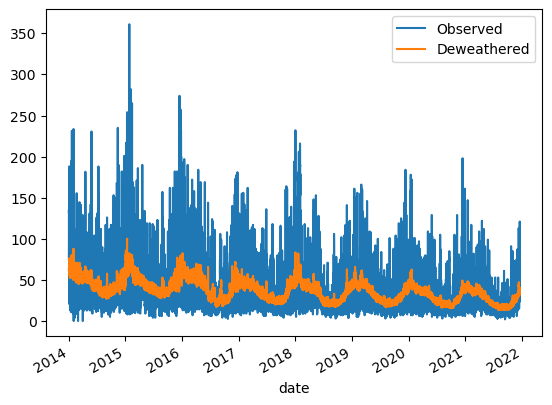

In [9]:
df_dew.plot()

In [10]:
#from normet.autodew import prepare_data

In [11]:
df=pd.read_csv(r'./normet/datasets/testing_data.csv',parse_dates=['date'])
df=ad.prepare_data(df, value='PM2.5', split_method = 'random',na_rm=False, replace=False, fraction=0.75)

/Users/user/Documents/GitHub/NORmet/normet/autodew.py:76: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  df[col].fillna(mode(df[col])[0][0], inplace=True)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


In [12]:
#from normet.autodew import train_model

In [13]:
df.head()

,rowid,date,ssr,tp,blh,tcc,sp,ws,wd,air_temp,...,SO2,PM10,value,Ox,Lunar_monthday,date_unix,day_julian,weekday,hour,set
0,0,2014-01-01 08:00:00,2.174436e+05,1.734723e-18,126.394356,0.0,102103.726354,1.0,250.0,1.5,...,55.9,154.1,132.9,39.024959,12&1,1.388563e+09,1,3,8,training
1,1,2014-01-01 11:00:00,1.678927e+06,1.734723e-18,587.669479,0.0,102101.273582,4.0,250.0,12.1,...,59.8,141.9,135.4,44.647072,12&1,1.388574e+09,1,3,11,training
2,2,2014-01-01 14:00:00,1.653660e+06,1.734723e-18,1481.787000,0.0,101795.202690,5.0,270.0,15.5,...,27.7,96.4,87.5,49.388922,12&1,1.388585e+09,1,3,14,training
3,3,2014-01-01 17:00:00,1.850793e+05,1.734723e-18,101.073459,0.0,101851.704042,1.0,250.0,12.8,...,24.7,99.6,73.9,56.152591,12&1,1.388596e+09,1,3,17,training
4,4,2014-01-02 08:00:00,2.150776e+05,1.734723e-18,90.544400,0.0,102023.748470,1.0,90.0,2.7,...,31.9,70.3,102.9,48.502235,12&2,1.388650e+09,2,4,8,training


In [14]:
automl=ad.train_model(df,variables=all_features,
                time_budget= 10,  metric= 'r2', task= 'regression', seed= 7654321);

[flaml.automl.automl: 03-27 20:30:21] {2726} INFO - task = regression
[flaml.automl.automl: 03-27 20:30:21] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 03-27 20:30:21] {2731} INFO - Evaluation method: holdout
[flaml.automl.automl: 03-27 20:30:21] {2858} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 03-27 20:30:21] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 03-27 20:30:21] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 03-27 20:30:21] {3472} INFO - Estimated sufficient time budget=261s. Estimated necessary time budget=2s.
[flaml.automl.automl: 03-27 20:30:21] {3519} INFO -  at 0.1s,	estimator lgbm's best error=0.9164,	best estimator lgbm's best error=0.9164
[flaml.automl.automl: 03-27 20:30:21] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 03-27 20:30:21] {3519} INFO -  at 0.1s,	estimator lgbm's best error=0.9164,	best estim

In [15]:
#from normet.autodew import normalise

In [16]:
date_start = time.time()
df_dew = ad.normalise(automl, df, 
                           feature_names = all_features,
                          variables= ['ws','wd', 'air_temp', 'atmos_pres', 'dew_point', 'RH','blh'],
                          n_samples=100)
date_post_training = time.time()
date_post_training-date_start

1.5459299087524414

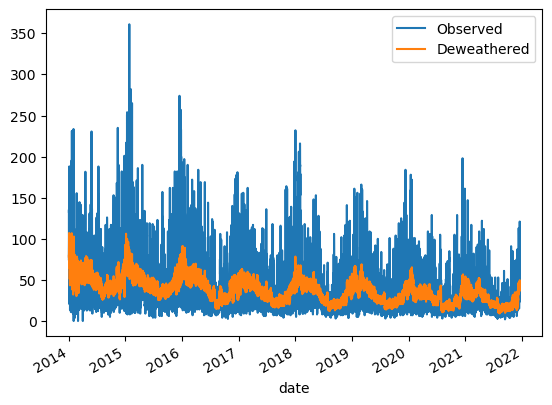

In [17]:
df_dew.plot()

In [18]:
#from normet.autodew import modStats

In [19]:
ad.modStats(df,set='testing')

/Users/user/Documents/GitHub/NORmet/normet/autodew.py:217: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['value_predict']=automl.predict(df)


,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_Value,COE,IOA
0,5670,0.853616,-0.222386,13.939644,-0.005723,0.358711,20.51647,0.73977,0.0,0.36481,0.682405


In [20]:
import normet.pdp as pdp

In [21]:
pdp_value=pdp.pdp_all(automl,df,feature_names=all_features)

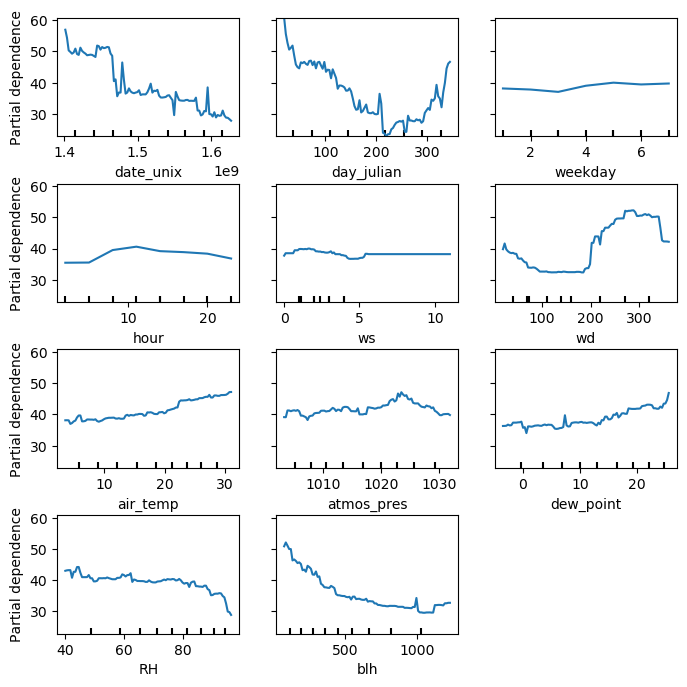

In [22]:
pdp.pdp_plot(automl, df, feature_names=all_features,figsize=(8,8),hspace=0.4)

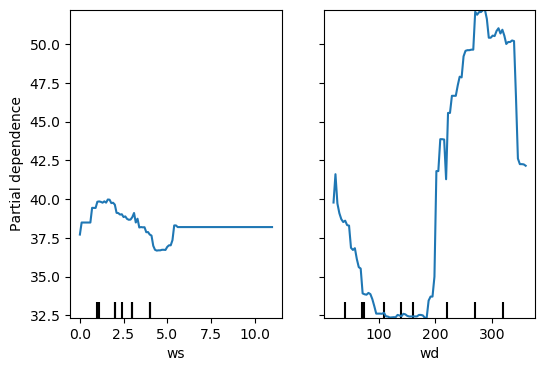

In [23]:
pdp.pdp_plot(automl, df, feature_names=all_features,variables=['ws','wd'],kind='average',figsize=(6,4),hspace=0.4)

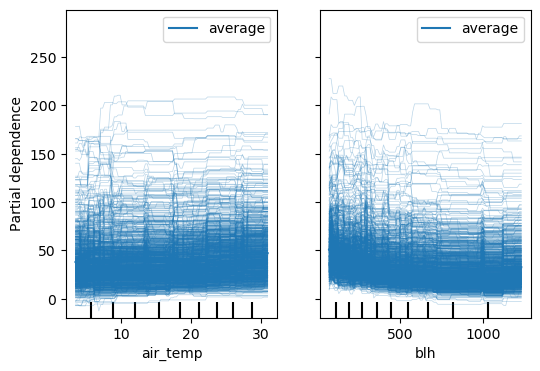

In [25]:
pdp.pdp_plot(automl, df, feature_names=all_features,variables=['air_temp','blh'],kind='both',figsize=(6,4),hspace=0.4)

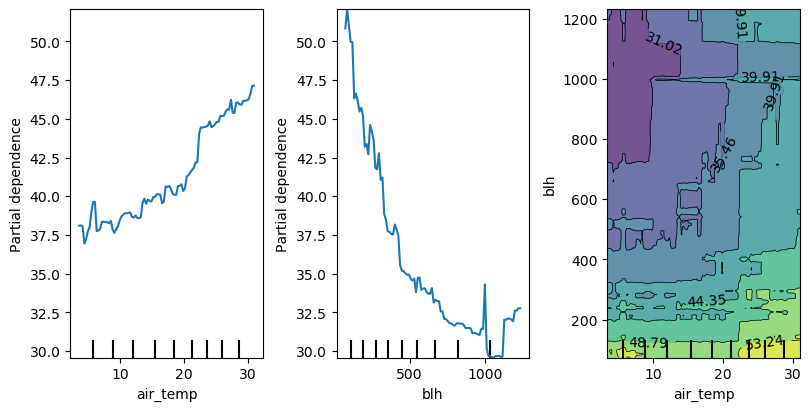

In [26]:
pdp.pdp_interaction(automl,df,variables=['air_temp','blh',('air_temp','blh')],kind='average',
                training_only=True,ncols=3,figsize=(8,4),constrained_layout=True)

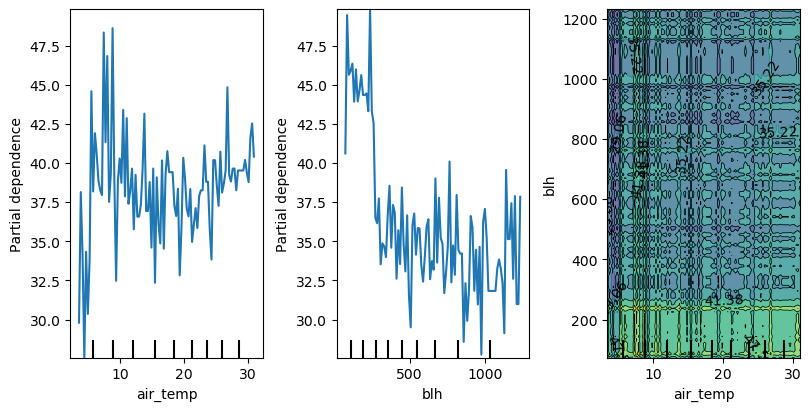

In [27]:
pdp.pdp_nointeraction(automl,df,feature_names=all_features,variables=['air_temp','blh',('air_temp','blh')],
                  kind='average',training_only=True,ncols=3,figsize=(8,4),constrained_layout=True)